# Tip-prediction-nyc

[ES]
Este notebook tiene como objetivo aplicar y validar las funciones desarrolladas en el proyecto, las cuales han sido organizadas de manera modular siguiendo buenas prácticas de ingeniería de software en ciencia de datos.

[EN]
This notebook aims to apply and validate the developed functions, which have been modularized following software engineering best practices in data science.

In [ ]:
# Librerias // Libraries
import sys
import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Ruta absoluta a la carpeta src // Absolute path to the src folder
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)

# Importar funciones // Import functions
from data.dataset import download_data, load_and_process_dataset
from features.build_features  import build_features
from models.train import train_model
from models.predict import predict_with_threshold, evaluate_f1_score
from visualization.plots import (
    plot_confusion_matrix,
    plot_probability_histogram,
    plot_feature_importances
)

In [2]:
# Descargar y guardar el dataset // Download and load the dataset
url = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-01.parquet"
output_filename = "yellow_tripdata_2020-01.parquet"
ruta_archivo = download_data(url, output_filename)


Archivo guardado en: c:\Users\csolis\OneDrive - Nutreco Nederland B.V\Desktop\tip-prediction-nyc\data\raw\yellow_tripdata_2020-01.parquet


In [3]:
# Cargar y procesar el dataset // Load and process the dataset
raw_path = os.path.join('..', 'data', 'raw', 'yellow_tripdata_2020-01.parquet')
processed_path = os.path.join('..', 'data', 'processed', 'yellow_tripdata_2020-01.parquet')
df = load_and_process_dataset(raw_path, processed_path)
df.head()

Archivo procesado guardado en: ..\data\processed\yellow_tripdata_2020-01.parquet


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,congestion_surcharge,airport_fee,tip_fraction,target,pickup_weekday,pickup_hour,pickup_minute,work_hours,trip_time,trip_speed
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1,...,2.5,None,0.245000,1,2,0,28,0,288.0,0.004167
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1,...,2.5,None,0.214286,1,2,0,35,0,445.0,0.002697
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1,...,2.5,None,0.166667,0,2,0,47,0,371.0,0.001617
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1,...,0.0,None,0.247273,1,2,0,55,0,291.0,0.002749
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2,...,0.0,None,0.000000,0,2,0,1,0,138.0,0.000000


In [4]:
# Ejecuta la función para generar features // Run the function to generate features
X, y = build_features(df)
print("Features:\n", X.head())
print("Target:\n", y.head())

Features:
    pickup_weekday  pickup_hour  work_hours  pickup_minute  passenger_count  \
0               2            0           0             28              1.0   
1               2            0           0             35              1.0   
2               2            0           0             47              1.0   
3               2            0           0             55              1.0   
4               2            0           0              1              1.0   

   trip_distance  trip_time  trip_speed  PULocationID  DOLocationID  \
0            1.2      288.0    0.004167           238           239   
1            1.2      445.0    0.002697           239           238   
2            0.6      371.0    0.001617           238           238   
3            0.8      291.0    0.002749           238           151   
4            0.0      138.0    0.000000           193           193   

   RatecodeID  
0         1.0  
1         1.0  
2         1.0  
3         1.0  
4         1.0

In [ ]:
# Entrenar el modelo // Train the model
model = train_model(X, y)


Creando directorio: c:\Users\csolis\OneDrive - Nutreco Nederland B.V\Desktop\tip-prediction-nyc\models
Entrenando el modelo...
Modelo guardado en: c:\Users\csolis\OneDrive - Nutreco Nederland B.V\Desktop\tip-prediction-nyc\models\random_forest_model.joblib


In [5]:
# Cargar el modelo previamente entrenado // Load the previously trained model
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
model_path = os.path.join(BASE_DIR, "models", "random_forest_model.joblib")
rfc = joblib.load(model_path)
  

In [7]:
# Generar predicciones con umbral // Generate predictions with threshold
y_pred = predict_with_threshold(rfc, X)

# Evaluar F1-score // Evaluate F1-score
f1 = evaluate_f1_score(y_true=y, y_pred=y_pred)


F1-score: 0.7293


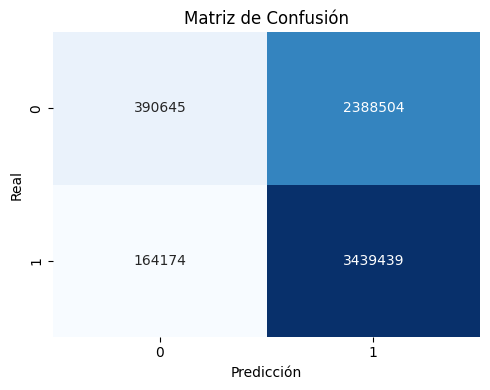

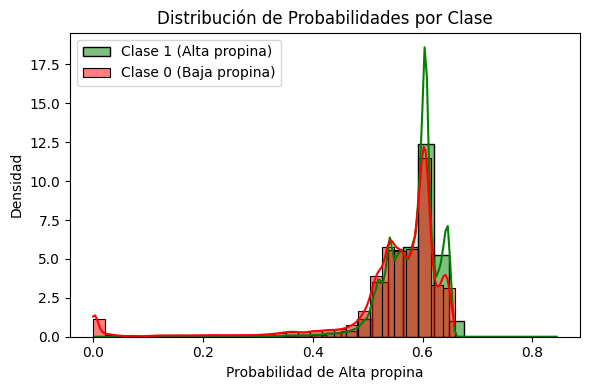

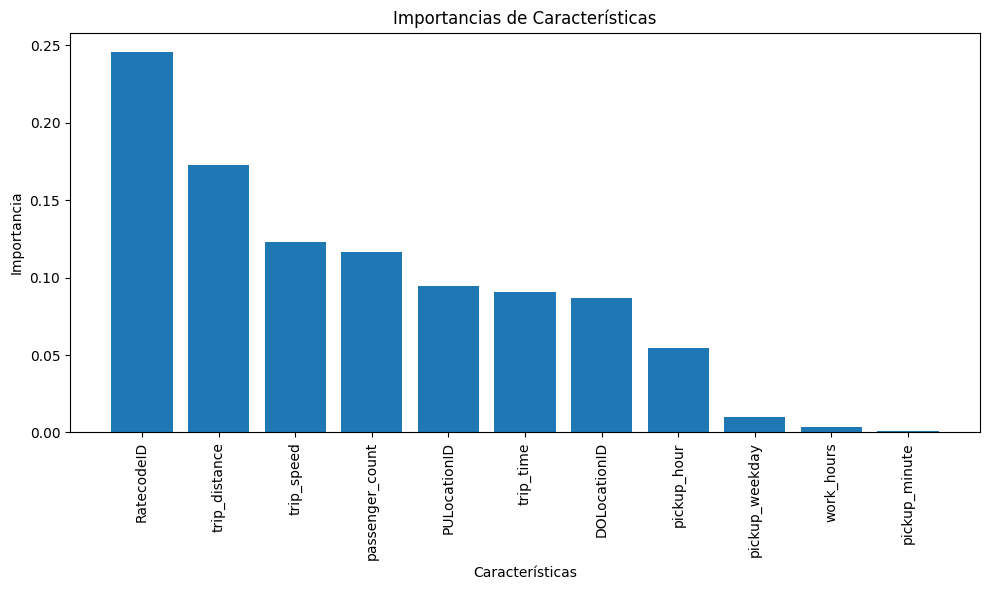

In [8]:
# Visualizar resultados // Visualize results
plot_confusion_matrix(y_true=y, y_pred=y_pred)
plot_probability_histogram(model=rfc, X=X, y_true=y)
plot_feature_importances(model=rfc, feature_names=X.columns)


In [12]:
# Define meses a evaluar // Define months to evaluate
months = ["2020-02", "2020-03", "2020-04", "2020-05", "2020-06", "2020-07", "2020-08", "2020-09", "2020-10", "2020-11", "2020-12"]
url_base = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_"

# Inicializar la lista de resultados // Initialize the results list
results = [] 
for month in months:
    print(f"\n Evaluando mes: {month}")
    
    # Paso 1: Descargar y guardar raw // Download and save raw data
    url = f"{url_base}{month}.parquet"
    filename = f"yellow_tripdata_{month}.parquet"
    raw_path = download_data(url, filename)
    
    # Paso 2: Procesar dataset // Process dataset
    processed_path = raw_path.replace("raw", "processed")
    df = load_and_process_dataset(raw_path, processed_path)
    
    # Paso 3: Construir features // Build features
    X, y = build_features(df)
    
    # Paso 4: Predecir y evaluar F1-score // Predict and evaluate F1-score
    y_pred = predict_with_threshold(rfc, X)
    f1 = evaluate_f1_score(y_true=y, y_pred=y_pred)

    # Paso 5: Guardar el resultado en una lista // Save the result in a list
    results.append({
        "month": month,
        "f1_score": f1
    })

# Paso Final: Generar un DataFrame con los resultados // Generate a DataFrame with the results
results_df = pd.DataFrame(results)



 Evaluando mes: 2020-02
Archivo guardado en: c:\Users\csolis\OneDrive - Nutreco Nederland B.V\Desktop\tip-prediction-nyc\data\raw\yellow_tripdata_2020-02.parquet
Archivo procesado guardado en: c:\Users\csolis\OneDrive - Nutreco Nederland B.V\Desktop\tip-prediction-nyc\data\processed\yellow_tripdata_2020-02.parquet
F1-score: 0.7346

 Evaluando mes: 2020-03
Archivo guardado en: c:\Users\csolis\OneDrive - Nutreco Nederland B.V\Desktop\tip-prediction-nyc\data\raw\yellow_tripdata_2020-03.parquet
Archivo procesado guardado en: c:\Users\csolis\OneDrive - Nutreco Nederland B.V\Desktop\tip-prediction-nyc\data\processed\yellow_tripdata_2020-03.parquet
F1-score: 0.7255

 Evaluando mes: 2020-04
Archivo guardado en: c:\Users\csolis\OneDrive - Nutreco Nederland B.V\Desktop\tip-prediction-nyc\data\raw\yellow_tripdata_2020-04.parquet
Archivo procesado guardado en: c:\Users\csolis\OneDrive - Nutreco Nederland B.V\Desktop\tip-prediction-nyc\data\processed\yellow_tripdata_2020-04.parquet
F1-score: 0.612

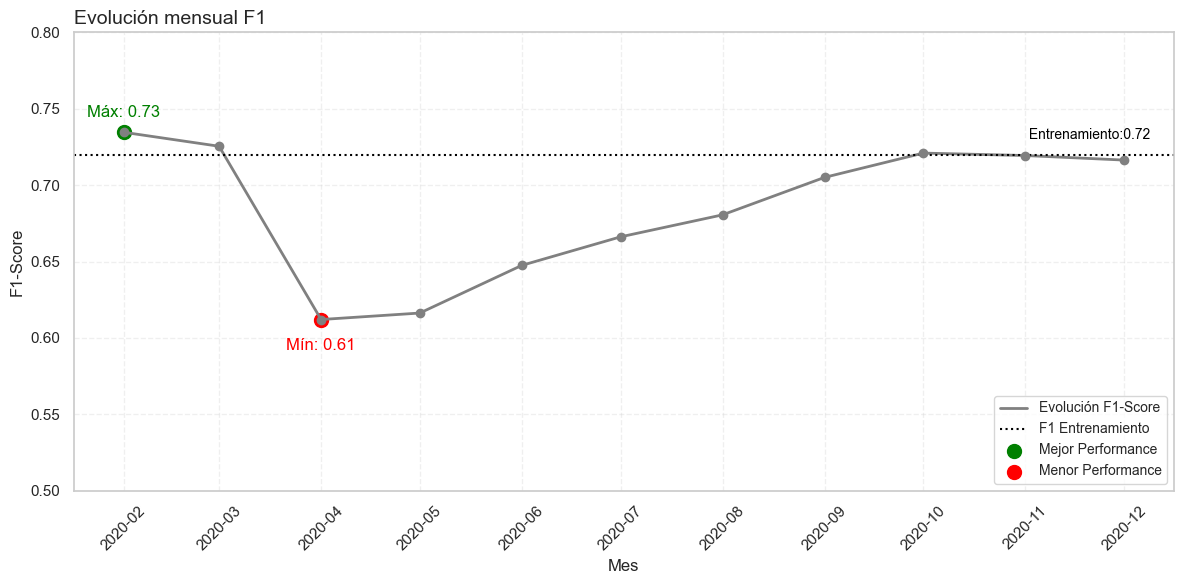

In [85]:
# Preparar los datos para la visualización // Prepare data for visualization
results_df["month"] = pd.to_datetime(results_df["month"])
results_df = results_df.sort_values("month")
x = results_df["month"]
y = results_df["f1_score"]

# F1-Score de entrenamiento // F1-Score of training
f1_train = 0.72

# Crear la figura // Create the figure
plt.figure(figsize=(12, 6))

# Visualizar la evolución del F1-Score // Visualize the evolution of F1-Score
plt.plot(x, y, color="grey", linewidth=2, label="Evolución F1-Score")
plt.scatter(x, y, color="grey", zorder=5)
plt.axhline(f1_train, color="black", linestyle=":", linewidth=1.5, label="F1 Entrenamiento")

# Anotaciones // Annotations
plt.text(x.iloc[-2], f1_train + 0.01, f" Entrenamiento:{f1_train}" , color="black", fontsize=10, ha="left")
max_idx = y.idxmax()
plt.scatter(x.loc[max_idx], y.loc[max_idx], color="green", s=100, label="Mejor Performance")
plt.text(x.loc[max_idx], y.loc[max_idx]+0.01, f"Máx: {y.loc[max_idx]:.2f}", ha="center", color="green")
min_idx = y.idxmin()
plt.scatter(x.loc[min_idx], y.loc[min_idx], color="red", s=100, label="Menor Performance")
plt.text(x.loc[min_idx], y.loc[min_idx]-0.02, f"Mín: {y.loc[min_idx]:.2f}", ha="center", color="red")

# Ejes y estética // Axes and aesthetics
plt.title("Evolución mensual F1", fontsize=14,loc="left")
plt.xlabel("Mes", fontsize=12)
plt.ylabel("F1-Score", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0.5, 0.8)
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend(loc="lower right", fontsize=10)
plt.tight_layout()
plt.show()

